# Regressao Linear

In [1]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]



x1 = []
x2 = []
for i in (diabetes_X_train):
    x1.append([1,i[0]])
   

for i in (diabetes_X_test):
    x2.append([1,i[0]])
    
    
diabetes_X_train = x1
diabetes_X_test = x2


In [3]:
class LMSTrainer(BaseEstimator):
    
    
    def __init__(self, analitic=False):
            
            self.analitic = analitic
            self._trained = False
            self.a = 0.
            self.b = 0.
            
            self.coef_ = [0.,0.]
            self.erro_medio_q = []
            self.n_inter = 0
            
    def fit(self, X, y=None,max_interacao = 100000,alfa = 0.0001,tolerancia = 0.0001):
        
        
        if self.analitic:
            
          # TODO: FAZER POR MATRIZES
            pass
        else:
           
          # TODO: FAZERPELO GRADIENTE DESCENDETE 
            teta1 = 0.
            teta0 = 0.
          
            erro = 0. # acc erro
            erro_mq = 0. # erro medio quadratico
            derivada1 = 0.
            derivada0 = 0.
            erro_mq_antes = 0.
            for _ in range(max_interacao):
                
                erro = 0.
                for xi,yi in zip(X,y):
                    erro += ((xi[1]*teta1 +teta0) - yi)**2
                    
                    
                erro_mq = ( 1 / (2*len(y)) )* erro
                self.erro_medio_q.append(  erro_mq)
                for xi,yi in zip(X,y):
                    derivada1 = ((xi[1]*teta1 +teta0) - yi) * xi[1]
                    derivada0 = ((xi[1]*teta1 +teta0) - yi)
                    
                    teta1 = teta1 - (alfa/len(y))*derivada1
                    teta0 = teta0 - (alfa/len(y))*derivada0
                   # print(teta0)
                  
                self.n_inter += 1
                if abs(erro_mq - erro_mq_antes) < tolerancia:
                    
                    break
                erro_mq_antes = erro_mq
                
                
                
            pass
    
        self._trained = True
        
        self.a = teta1
        self.b = teta0
        self.coef_[0] = teta0
        self.coef_[1] = teta1
        
        return self
        
    def predict(self, X, y=None):
        
        saida = []
        
        if not self._trained:
           raise RuntimeError("You must train classifer before predicting data!")
        
        for xi in (X):
            saida.append(self.a*xi[1] + self.b)
    
        return saida# resultado

In [ ]:
'''
X_train = [[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10]]
#y_train = [-1,-3,-5,-7,-9,-11,-13,-15,-17,-19]
y_train = [2,3.3+1,6.7,8.9,10,11+1.1,14,15.5+2,17.1,19.5]
X_test  = [[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10]]
y_test  = y_train # [2,4,6,8,10,12,14,16,18,20]
'''
trainer = LMSTrainer()
predictor = trainer.fit(diabetes_X_train,diabetes_y_train,50000,0.75,0.0000001)

trainer.coef_

In [ ]:
#X_test = [[1,22],[0,38],[1,14],[1,22],[0,0],[1,55],[1,49],[1,29],[1,33]]
y_pred = predictor.predict(diabetes_X_test)
xi = []
for i in (diabetes_X_test):
    xi.append(i[1])


In [ ]:
# The coefficients
'''
print('Coefficients: \n', trainer.coef_)
plt.figure(figsize=(10,5))
plt.scatter(xi,y_train,  color='black')
plt.plot(xi, y_pred, color='blue', linewidth=3)

plt.xticks((xi))
plt.yticks((y_train))

plt.show()'''

In [176]:
aux = diabetes_X_test
diabetes_X_test = xi


Coefficients: 
 [153.6605690010081, 937.45454987503081]


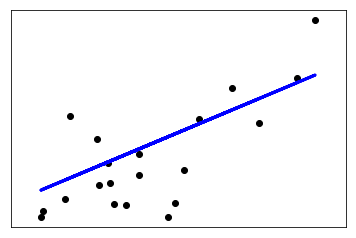

In [177]:
print('Coefficients: \n', trainer.coef_)
#plt.figure(figsize=(10,5))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
diabetes_X_test = aux

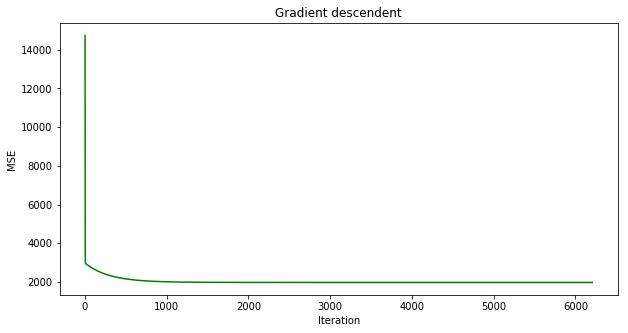

In [178]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, trainer.n_inter+1), trainer.erro_medio_q, color='green')
plt.title("Gradient descendent")
plt.ylabel("MSE")
plt.xlabel("Iteration")
plt.show()